## import packages

In [4]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')

%xmode Minimal

Exception reporting mode: Minimal


## import data

In [2]:
import os
PATH_TO_SPIDER = os.environ['SPIDER_PATH']

In [5]:
with open(f'{PATH_TO_SPIDER}/train_spider.json', 'r') as f:
    data_train_lst = json.load(f)
with open(f'{PATH_TO_SPIDER}/dev.json', 'r') as f:
    data_dev_lst = json.load(f)
with open(f'{PATH_TO_SPIDER}/tables.json', 'r') as f:
    data_table_lst = json.load(f)

## helper function

In [3]:
def get_tokens_count_df(
    json_data_lst: list, 
    token_keys_lst: list,
) -> pd.DataFrame:
    """"""
    df_dict = {}
    for key in token_keys_lst:
        lst = []
        for data in json_data_lst:
            lst.append(len(data[key]))
        df_dict[key] = lst

    return pd.DataFrame.from_dict(df_dict)


## train_spider.json

In [4]:
data_train_keys = [
    'question_toks',
    'query_toks',
    'query_toks_no_value',
]

tokens_train_df = get_tokens_count_df(
    json_data_lst=data_train_lst, 
    token_keys_lst=data_train_keys,
)

### summary of dataset

In [5]:
tokens_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   question_toks        7000 non-null   int64
 1   query_toks           7000 non-null   int64
 2   query_toks_no_value  7000 non-null   int64
dtypes: int64(3)
memory usage: 164.2 KB


In [6]:
tokens_train_df.describe().round(2)

,question_toks,query_toks,query_toks_no_value
count,7000.00,7000.00,7000.00
mean,14.18,18.49,21.69
std,4.67,9.96,14.69
min,4.00,4.00,4.00
25%,11.00,11.00,10.00
50%,14.00,16.00,16.00
75%,17.00,24.00,32.00
max,44.00,90.00,125.00


### visualizaitons of data distribution

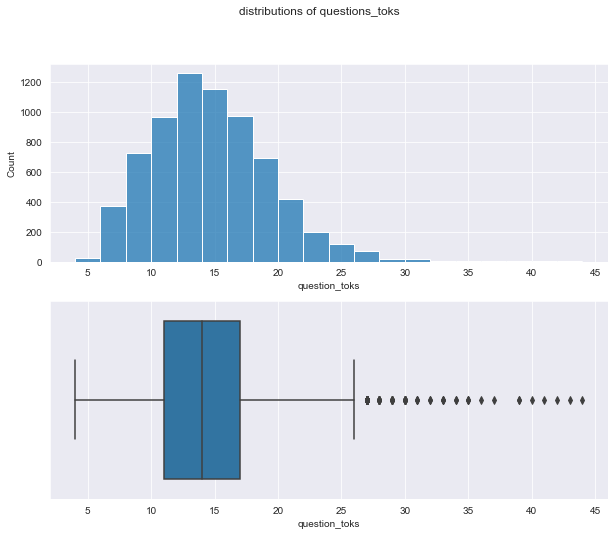

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8));
sns.histplot(x=tokens_train_df.question_toks, ax=ax[0], binwidth=2);
sns.boxplot(x=tokens_train_df.question_toks, ax=ax[1]);
fig.suptitle('distributions of questions_toks');

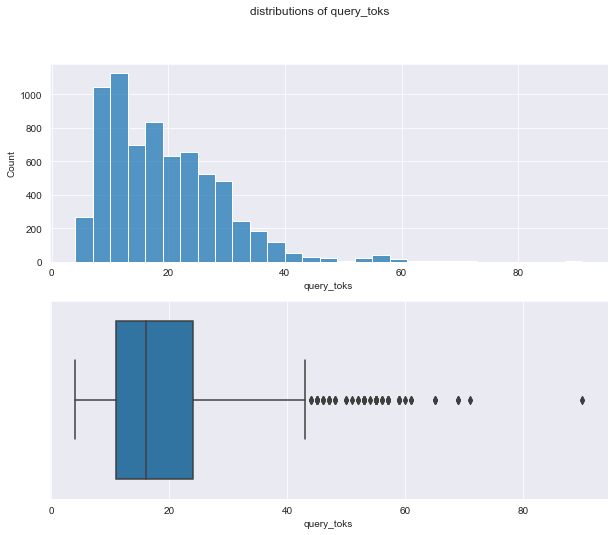

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8));
sns.histplot(x=tokens_train_df.query_toks, ax=ax[0], binwidth=3);
sns.boxplot(x=tokens_train_df.query_toks, ax=ax[1]);
fig.suptitle('distributions of query_toks');

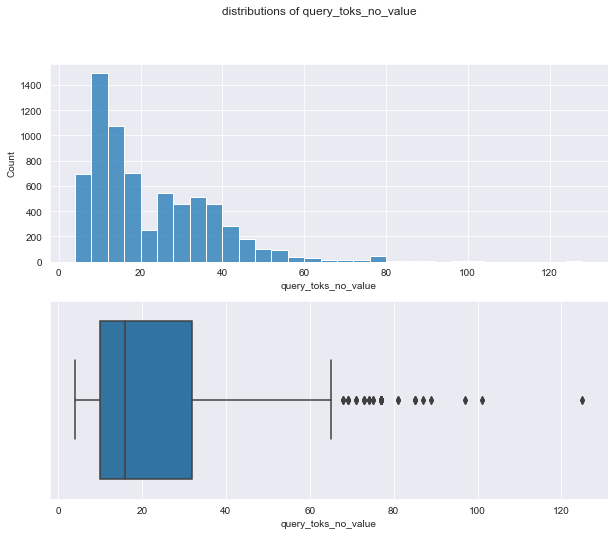

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8));
sns.histplot(x=tokens_train_df.query_toks_no_value, ax=ax[0], binwidth=4);
sns.boxplot(x=tokens_train_df.query_toks_no_value, ax=ax[1]);
fig.suptitle('distributions of query_toks_no_value');

## dev.json

In [10]:
data_dev_keys = [
    'question_toks',
    'query_toks',
    'query_toks_no_value',
]

tokens_dev_df = get_tokens_count_df(
    json_data_lst=data_dev_lst, 
    token_keys_lst=data_dev_keys,
)

### summary of dataset

In [11]:
tokens_dev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   question_toks        1034 non-null   int64
 1   query_toks           1034 non-null   int64
 2   query_toks_no_value  1034 non-null   int64
dtypes: int64(3)
memory usage: 24.4 KB


In [12]:
tokens_dev_df.describe().round(2)

,question_toks,query_toks,query_toks_no_value
count,1034.00,1034.00,1034.00
mean,13.74,18.32,21.40
std,4.53,9.79,14.57
min,5.00,4.00,4.00
25%,10.00,12.00,10.00
50%,13.00,16.00,16.00
75%,16.00,24.00,31.00
max,33.00,63.00,88.00


### visualizaitons of data distribution

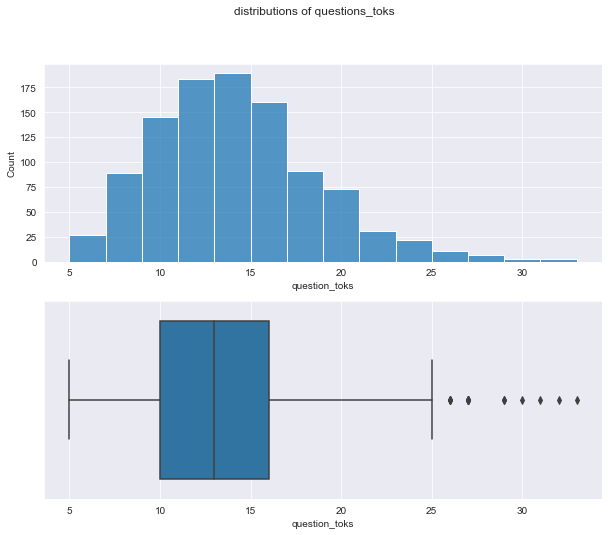

In [13]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8));
sns.histplot(x=tokens_dev_df.question_toks, ax=ax[0], binwidth=2);
sns.boxplot(x=tokens_dev_df.question_toks, ax=ax[1]);
fig.suptitle('distributions of questions_toks');

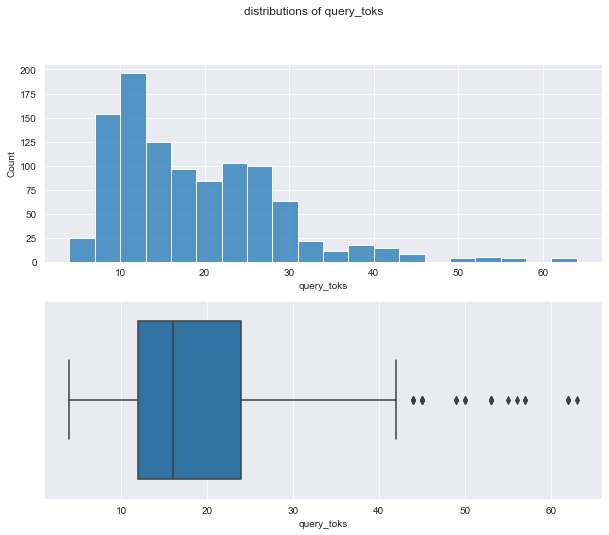

In [14]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8));
sns.histplot(x=tokens_dev_df.query_toks, ax=ax[0], binwidth=3);
sns.boxplot(x=tokens_dev_df.query_toks, ax=ax[1]);
fig.suptitle('distributions of query_toks');

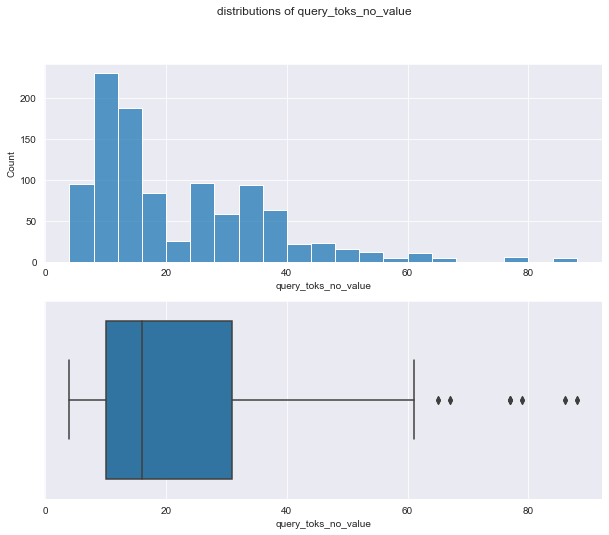

In [15]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8));
sns.histplot(x=tokens_dev_df.query_toks_no_value, ax=ax[0], binwidth=4);
sns.boxplot(x=tokens_dev_df.query_toks_no_value, ax=ax[1]);
fig.suptitle('distributions of query_toks_no_value');

## table.json

In [6]:
len(data_table_lst)

166